<a href="https://colab.research.google.com/github/omkarmalwadkar2004/Airline_RS/blob/main/Laliga_Scores_by_omii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To mount google drive

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/great_learning_exl')


Mounted at /content/drive


Import necessary libraries

In [1]:
%matplotlib inline
#to disply
import pandas as pd    # primariy to handle dataframes
import numpy as np     # for arithmatic operations on vectors
import matplotlib.pyplot as plt   # visualization library
import seaborn as sns
sns.set(color_codes=True)

1. Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data. And check the distribution for the ‘Best Position’ and report the top position (7 points)



In [2]:
df = pd.read_csv('Laliga_scores.csv')
print(df.shape)
df.head(10)

(61, 18)


,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,1934-35,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,1929,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,1929,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,1939-40,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,1932-33,1


The head of the data gives us a good idea of what the data looks like.
In this case, we can see there are 18 columns and 62 rows of data.
There are a bunch of categorical columns and few numerical ones.
And we also see there are missing values in the data.

In [3]:
df == '-'

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
57,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
58,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
59,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False


In [4]:
df1=df.copy()

In [5]:
df1.head(10)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,1934-35,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,1929,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,1929,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,1939-40,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,1932-33,1


Replacing dashes with zeroes in the copied data fame df1.

In [ ]:
for i in range(61):
  for j in ['Points', 'GamesPlayed', 'GamesWon', 'GamesDrawn','GamesLost','GoalsFor', 'GoalsAgainst', 'Champion', 'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth']:
    if df1.at[i,j]=='-':
      df1.at[i,j]=0

In [6]:
df1.head(61)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,1955-56,15


All dashes are replaced with zeroes.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pos           61 non-null     int64 
 1   Team          61 non-null     object
 2   Seasons       61 non-null     int64 
 3   Points        61 non-null     object
 4   GamesPlayed   61 non-null     object
 5   GamesWon      61 non-null     object
 6   GamesDrawn    61 non-null     object
 7   GamesLost     61 non-null     object
 8   GoalsFor      61 non-null     object
 9   GoalsAgainst  61 non-null     object
 10  Champion      61 non-null     object
 11  Runner-up     61 non-null     object
 12  Third         61 non-null     object
 13  Fourth        61 non-null     object
 14  Fifth         61 non-null     object
 15  Sixth         61 non-null     object
 16  Debut         61 non-null     object
 17  BestPosition  61 non-null     int64 
dtypes: int64(3), object(15)
memory usage: 8.7+ KB


There are no missing values in any column.

<ipython-input-8-91af9cb58feb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column] )


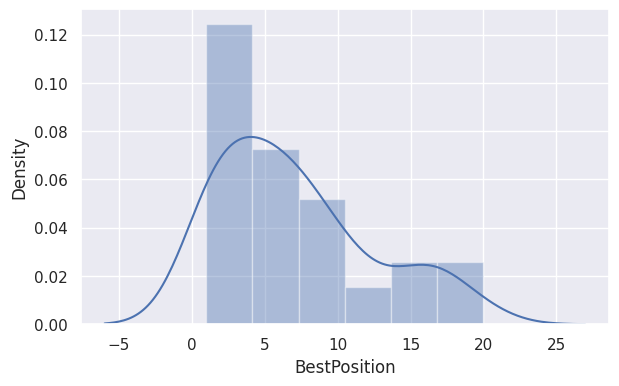

In [8]:
plt.figure(figsize=(15,9))

for column in ['BestPosition']:

    plt.subplot(2,2,1)

    sns.distplot(df1[column] )


plt.show()

The distribution is slightly right skewed and there are two peaks, one of which is quite smaller.

We can look at the boxplots to get an even better idea about the distribution.

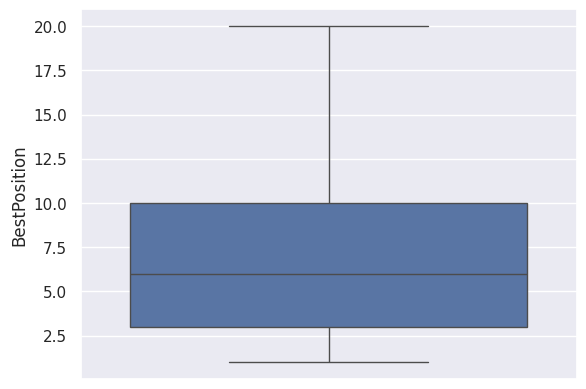

In [9]:
sns.boxplot(df1['BestPosition']);

Median is around 6.

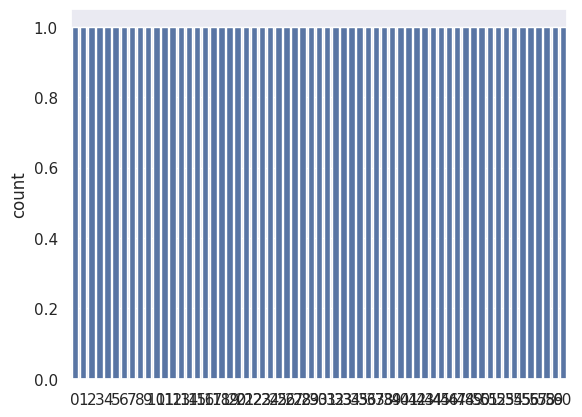

In [10]:
sns.countplot(df1['BestPosition']);

2. Print all the teams which have started playing between 1930-1980 using “Debut” column(Include
year 1930 only) (6 points)

In [11]:
df2=df1.copy()

Sorted using debut column.

In [ ]:
df2=df2.sort_values(by=['Debut'])

In [ ]:
df2=df2.reset_index(drop=True)

In [ ]:
df2.head(20)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
1,14,Racing Santander,44,1416,1428,453,336,639,1843,2368,0,1,1,2,0,1,1929,2
2,45,Arenas,7,107,130,43,21,66,227,308,0,0,1,0,3,0,1929,3
3,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,1929,1
4,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,1929,3
5,52,Real Union,4,56,72,21,14,37,153,184,0,0,0,0,0,1,1929,6
6,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1
7,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
8,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
9,54,Europa,3,42,54,18,6,30,97,131,0,0,0,0,0,0,1929,8


In [12]:
df2.tail(20)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
41,42,Pontevedra,6,150,180,53,44,83,165,221,-,-,-,-,-,-,1963-64,7
42,43,Numancia,4,148,152,37,37,78,155,253,-,-,-,-,-,-,1999-00,17
43,44,Eibar,3,132,114,35,27,52,139,167,-,-,-,-,-,-,2014-15,10
44,45,Arenas,7,107,130,43,21,66,227,308,-,-,1,-,3,-,1929,3
45,46,Real Burgos,3,96,114,26,44,44,101,139,-,-,-,-,-,-,1990-91,9
46,47,Gimnastic,4,91,116,34,16,66,181,295,-,-,-,-,-,-,1947-48,7
47,48,Extremadura,2,83,80,20,23,37,62,117,-,-,-,-,-,-,1996-97,17
48,49,Merida,2,81,80,19,24,37,70,115,-,-,-,-,-,-,1995-96,19
49,50,Alcoyano,4,76,108,30,16,62,145,252,-,-,-,-,-,-,1945-46,10
50,51,Jaen,3,71,90,29,13,48,121,183,-,-,-,-,-,-,1953-54,14


In [13]:
for i in range(10,46,1):
  print(df2.at[i,'Team'])

Deportivo La Coruna
Celta Vigo
Valladolid
Racing Santander
Sporting Gijon
Osasuna
Malaga
Oviedo
Mallorca
Las Palmas
Villarreal
Granada
Rayo Vallecano
Elche
Getafe
Hercules
Tenerife
Murcia
Alaves
Levante
Salamanca
Sabadell
Cadiz
Logrones
Castellon
Albacete
Almeria
Cordoba
Compostela
Recreativo
Burgos CF
Pontevedra
Numancia
Eibar
Arenas
Real Burgos


3. Print the list of teams which came Top 5 in terms of points (5 points)

In [16]:
df3=df1.copy()

In [17]:
df3.head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1


Already sorted in descending order in terms of points. So top 5 teams are the 5 at head.

4. Write a function with the name “Goal_diff_count” which should return all the teams with their Goal
Differences. (5 points)
Goal_diff_count = GoalsFor - GoalsAgainst

In [23]:
df4=df1.copy()

In [28]:
def Goal_diff_count(df,i):
  x= df.at[i,'GoalsFor']
  y=df.at[i,'GoalsAgainst']
  # Replacing hyphens with 0 for numeric conversion
  x = x.replace('-', '0')
  y = y.replace('-', '0')
  x1=pd.to_numeric(x)
  y1=pd.to_numeric(y)
  return x1-y1;


In [32]:
for i in range(61):
  score=Goal_diff_count(df4,i)
  print(df4.at[i,'Team'],score)
  print('\n')

Real Madrid 2807


Barcelona 2786


Atletico Madrid 1225


Valencia 929


Athletic Bilbao 931


Sevilla 307


Espanyol -280


Real Sociedad -2


Zaragoza -164


Real Betis -333


Deportivo La Coruna -136


Celta Vigo -346


Valladolid -413


Racing Santander -525


Sporting Gijon -399


Osasuna -334


Malaga -342


Oviedo -309


Mallorca -189


Las Palmas -399


Villarreal 103


Granada -338


Rayo Vallecano -328


Elche -272


Getafe -113


Hercules -334


Tenerife -125


Murcia -385


Alaves -165


Levante -202


Salamanca -159


Sabadell -228


Cadiz -269


Logrones -198


Castellon -169


Albacete -90


Almeria -122


Cordoba -145


Compostela -42


Recreativo -94


Burgos CF -94


Pontevedra -56


Numancia -98


Eibar -28


Arenas -81


Real Burgos -38


Gimnastic -114


Extremadura -55


Merida -45


Alcoyano -107


Jaen -62


Real Union -31


AD Almeria -45


Europa -34


Lleida -112


Leganes -19


Xerez -28


Condal -20


Atletico Tetuan -34


Cultural Leonesa -31


Girona 0



As can be seen from the output above, some teams have a negative Goal difference count which means that the total number of goals by the team is less than that against the team. Even Though they have negative values, still some of them are in top position because they have higher overall points and they have won a lot of games. Thus the goals gained by a team is not a determining factor for what position they hold.


5. Using the same function, find the team which has a maximum and minimum goal difference. (5 points)


To find maximum.

In [31]:
max=-30000000;
for i in range(61):
  score=Goal_diff_count(df4,i)
  if score>max:
    max=score
    j=i
print(df4.at[j,'Team'],max)


Real Madrid 2807


Real Madrid has the maximum value for goal difference which is 2807.
This means that the goals by the teams is  2807 more than that against the team.


To find minimum.

In [34]:
min=30000000;
for i in range(61):
  score=Goal_diff_count(df4,i)
  if score<min:
    min=score
    j=i
print(df4.at[j,'Team'],min)


Racing Santander -525


Racing Santander has the minimum value for goal difference which is -525.
This means that the goals by the teams is  525 less than that against the team.


6. Create a new column with the name “Winning Percent” and append it to the data set (7 points)
Percentage of Winning = (GamesWon / GamesPlayed)*100
If there are any numerical error, replace it with 0%


In [36]:
i=0
for i in range(61):
  x=pd.to_numeric(df1.at[i,'GamesWon'], errors='coerce') # Handle errors by setting them to NaN
  y=pd.to_numeric(df1.at[i,'GamesPlayed'], errors='coerce') # Handle errors by setting them to NaN
  if y==0:
     df1.at[i,'Winning Percent']=0
  if y!=0:
    df1.at[i,'Winning Percent']=x*100.00/y

In [ ]:
df1.head(20)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,59
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,57
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,47
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1,44
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,43
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,1934-35,1,41
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,1929,3,36
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,1929,1,37
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,1939-40,2,35
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,1932-33,1,35


In [37]:
df1.tail(20)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Winning Percent
41,42,Pontevedra,6,150,180,53,44,83,165,221,-,-,-,-,-,-,1963-64,7,29.444444
42,43,Numancia,4,148,152,37,37,78,155,253,-,-,-,-,-,-,1999-00,17,24.342105
43,44,Eibar,3,132,114,35,27,52,139,167,-,-,-,-,-,-,2014-15,10,30.701754
44,45,Arenas,7,107,130,43,21,66,227,308,-,-,1,-,3,-,1929,3,33.076923
45,46,Real Burgos,3,96,114,26,44,44,101,139,-,-,-,-,-,-,1990-91,9,22.807018
46,47,Gimnastic,4,91,116,34,16,66,181,295,-,-,-,-,-,-,1947-48,7,29.310345
47,48,Extremadura,2,83,80,20,23,37,62,117,-,-,-,-,-,-,1996-97,17,25.000000
48,49,Merida,2,81,80,19,24,37,70,115,-,-,-,-,-,-,1995-96,19,23.750000
49,50,Alcoyano,4,76,108,30,16,62,145,252,-,-,-,-,-,-,1945-46,10,27.777778
50,51,Jaen,3,71,90,29,13,48,121,183,-,-,-,-,-,-,1953-54,14,32.222222


7. Print the top 5 teams which have the highest Winning percentage (5 points)

In [38]:
df5=df1.copy()

In [39]:
df5.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,43.772629


Sort Using Winning Percent

In [40]:
df5=df5.sort_values(by=['Winning Percent'])

In [41]:
df5.tail(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Winning Percent
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1,44.557057
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,47.475134
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,57.241130
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,59.630702
60,61,Girona,1,-,-,-,-,-,-,-,-,-,-,-,-,-,2017-18,9,NaN


8. Group teams based on their “Best position” and print the sum of their points for all positions (10 points)


In [42]:
df6 = df1.copy()

We have to convert Points column to numeric data first and then group by Best Position to get the sum.

In [43]:
df6.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931-32,1,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,43.772629


In [46]:
df6["Points"] = pd.to_numeric(df6["Points"], errors='coerce').fillna(0).astype(int)

In [45]:
df7 = df6.groupby('BestPosition')

In [ ]:
print(df7.sum())

              Pos  Seasons  Points  Winning Percent
BestPosition                                       
1              50      659   27933              399
2              79      195    6904              172
3              89      154    5221              136
4             125      191    6563              188
5             115       63    1884              118
6             158       62    2113              150
7             190       38    1186              142
8             154       31    1134              114
9             107        4      96               22
10            186       13     450              114
11             28       18     445               24
12             74       18     511               51
14             51        3      71               32
15             60        1      14               16
16            172        4      81               65
17            147        7     266               70
19             49        2      81               23
20          